# Load package

In [1]:
% %matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data fields

TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting.

TripType_999 is an "other" category.

VisitNumber - an id corresponding to a single trip by a single customer

Weekday - the weekday of the trip

Upc - the UPC number of the product purchased

ScanCount - the number of the given item that was purchased. A negative value indicates a product return.

DepartmentDescription - a high-level description of the item's department

FinelineNumber - a more refined category for each of the products, created by Walmart

In [2]:
train = pd.read_csv("train.csv",index_col="VisitNumber")
test = pd.read_csv("test.csv",index_col="VisitNumber")

In [3]:
print(train.shape)
print(test.shape)

(647054, 6)
(653646, 5)


# Explore Data

### Unique Data

In [4]:
print("Train uinque")
for i in train.columns:
    print("{0} = {1} unique data".format(i, len(train[i].unique())))   

Train uinque
TripType = 38 unique data
Weekday = 7 unique data
Upc = 97715 unique data
ScanCount = 39 unique data
DepartmentDescription = 69 unique data
FinelineNumber = 5196 unique data


In [5]:
print("Test uinque")
for i in test.columns:
    print("{0} = {1} unique data".format(i, len(test[i].unique())))

Test uinque
Weekday = 7 unique data
Upc = 98148 unique data
ScanCount = 49 unique data
DepartmentDescription = 68 unique data
FinelineNumber = 5204 unique data


### Missing Data

In [6]:
print("train missing")
print("")
for i in train.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(train[train[i].isnull()]) / train.shape[0]) *100))

train missing

TripType has 0.00% missing data
Weekday has 0.00% missing data
Upc has 0.64% missing data
ScanCount has 0.00% missing data
DepartmentDescription has 0.21% missing data
FinelineNumber has 0.64% missing data


In [7]:
print("test missing")
print("")
for i in test.columns:
    print("{0} has {1:.2f}% missing data".format(i, (len(test[test[i].isnull()]) / test.shape[0]) *100)) 

test missing

Weekday has 0.00% missing data
Upc has 0.61% missing data
ScanCount has 0.00% missing data
DepartmentDescription has 0.20% missing data
FinelineNumber has 0.61% missing data


In [8]:
train.fillna(-9999, inplace=True)
test.fillna(-9999,inplace=True)

In [9]:
train["Upc"] = train["Upc"].astype("int64")
test["Upc"] = test["Upc"].astype("int64")

train["FinelineNumber"] = train["FinelineNumber"].astype("int64")
test["FinelineNumber"] = test["FinelineNumber"].astype("int64")

## Target Data = TripType

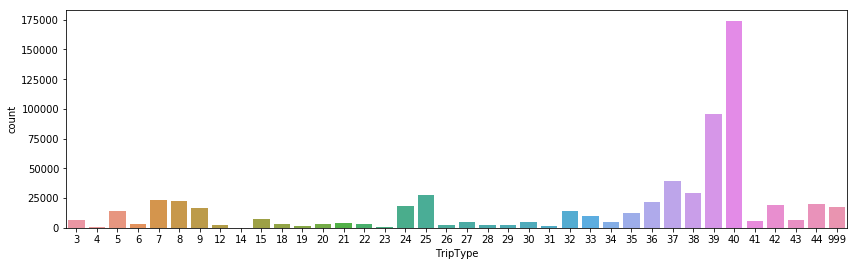

In [10]:
figure, ax = plt.subplots (nrows=1, ncols=1)
figure.set_size_inches(14,4)
sns.countplot(train["TripType"])

In [11]:
#key value
Top10_type = list(train["TripType"].value_counts()[0:10].index)

### Weekday

people ususally go shopping on weekend

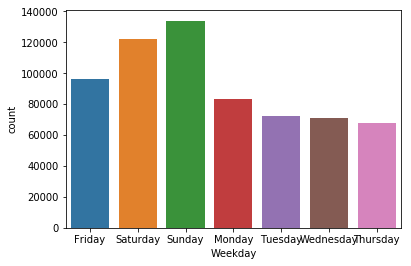

In [12]:
sns.countplot(train["Weekday"])

### DepartmentDescription

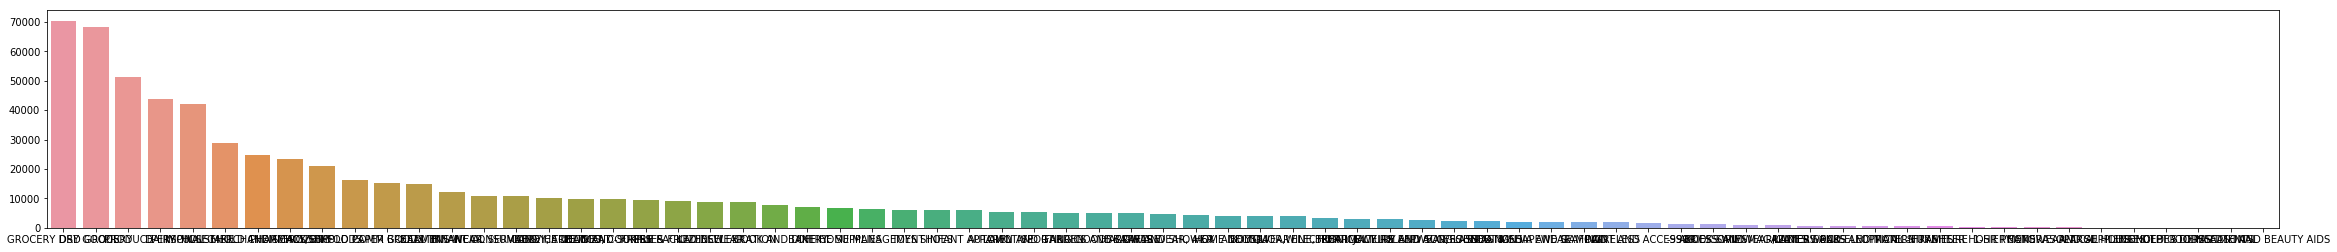

In [13]:
group = train["DepartmentDescription"].value_counts()
figure,ax = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(40,4)
sns.barplot(group.index, group.values)

In [14]:
#top of Dep
train["DepartmentDescription"].value_counts()[0:10]

GROCERY DRY GOODS           70402
DSD GROCERY                 68332
PRODUCE                     51115
DAIRY                       43820
PERSONAL CARE               41969
IMPULSE MERCHANDISE         28712
HOUSEHOLD CHEMICALS/SUPP    24880
PHARMACY OTC                23306
FROZEN FOODS                21101
HOUSEHOLD PAPER GOODS       16274
Name: DepartmentDescription, dtype: int64

### Upc

In [15]:
#top of Dep
train["Upc"].value_counts()[0:10]

 4011           7657
-9999           4129
 60538862097    2501
 7874235186     2067
 7874235187     1883
 4046           1652
 68113107862    1515
 60538871457    1487
 3338320027     1405
 4087           1370
Name: Upc, dtype: int64

### ScanCount

In [16]:
train["ScanCount"].describe()

count    647054.000000
mean          1.108878
std           0.700776
min         -12.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          71.000000
Name: ScanCount, dtype: float64

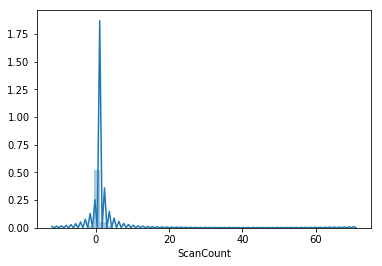

In [17]:
sns.distplot(train["ScanCount"])

### FinelineNumber

In [18]:
train["FinelineNumber"].value_counts()[0:10]

 5501    8244
 1508    5121
 135     4538
 808     4401
-9999    4129
 0       3837
 9546    2997
 1407    2848
 4606    2753
 115     2723
Name: FinelineNumber, dtype: int64

##  merge train and test

In [19]:
data_all = pd.concat([train,test],axis=0)

In [20]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300700 entries, 5 to 191348
Data columns (total 6 columns):
DepartmentDescription    1300700 non-null object
FinelineNumber           1300700 non-null int64
ScanCount                1300700 non-null int64
TripType                 647054 non-null float64
Upc                      1300700 non-null int64
Weekday                  1300700 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 69.5+ MB


# Preprocessing

### Department

In [21]:
depart_list = list(data_all["DepartmentDescription"].unique())

In [22]:
print(len(depart_list))
print(depart_list)

69
['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE', 'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN', 'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', -9999, 'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES', 'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS', 'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES', 'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI', 'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE', 'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY', 'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY', 'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES', 'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING', 'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS', 'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY', 'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR', 'LIQUOR,WINE,BEER', 'SLEEPWEAR/FOUNDATIONS', 'CAMERAS AND SUPPLIES', 'SPORTING GOODS', 'PLAYERS AN

MENSWEAR and MENS WEAR are smae one ,  OPTICAL - LENSES and OPTICAL - FRAMES too

In [23]:
data_all.loc[data_all["DepartmentDescription"] =="MENS WEAR","DepartmentDescription"]="MENSWEAR"
data_all.loc[data_all["DepartmentDescription"] =="OPTICAL - LENSES","DepartmentDescription"] ="LENSE"
data_all.loc[data_all["DepartmentDescription"] =="OPTICAL| - FRAMES","DepartmentDescription"] ="LENSE"

### Encode DepartmentDescription

In [24]:
depart = pd.get_dummies(data_all["DepartmentDescription"])
data_all =pd.concat([data_all,depart],axis=1)
data_all.drop("DepartmentDescription",axis=1,inplace=True)

### Encode Weekday

In [25]:
data_all["weekend"] = (data_all["Weekday"] == "Sunday")|(data_all["Weekday"]== "Saturday")

In [26]:
week = pd.get_dummies(data_all["Weekday"])
data_all =pd.concat([data_all,week],axis=1)
data_all.drop("Weekday",axis=1,inplace=True)

### Encode ScanCount(Neagative is return)

In [27]:
data_all["return"] = data_all["ScanCount"] < 0

In [28]:
data_all["return"] = data_all["return"].astype("int")

In [29]:
scant =pd.get_dummies(data_all["ScanCount"],prefix="ScanCount")

In [30]:
data_all =pd.concat([data_all,scant],axis=1)
data_all.drop("ScanCount",axis=1,inplace=True)

## Deal with Upc

In [31]:
upc = list(data_all["Upc"].astype("str"))

re_upc = []

for i in range(len(upc)):
    re_upc.append(upc[i][0:2])

In [32]:
data_all["re_upc"] = re_upc

In [33]:
len(data_all["re_upc"].unique())

91

In [34]:
re_upc = pd.get_dummies(data_all["re_upc"],prefix="re_upc")

In [35]:
re_col = list(re_upc.columns)

In [36]:
re_upc.reset_index(inplace=True)

In [37]:
re_upc = re_upc.astype("float32")

In [38]:
re_upc.head()

,VisitNumber,re_upc_-9,re_upc_10,re_upc_11,re_upc_12,re_upc_13,re_upc_14,re_upc_15,re_upc_16,re_upc_17,...,re_upc_90,re_upc_91,re_upc_92,re_upc_93,re_upc_94,re_upc_95,re_upc_96,re_upc_97,re_upc_98,re_upc_99
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
train_re_upc = re_upc[0:647054]
test_re_upc = re_upc[647054:1300700]

In [40]:
train_re_upc = train_re_upc.groupby("VisitNumber")[re_col].mean()

In [41]:
test_re_upc = test_re_upc.groupby("VisitNumber")[re_col].mean()

### Deal with Finenumber

select important finenumber selected by frequency of TripType

In [42]:
top150_40 = list(train.loc[train["TripType"]==40,"FinelineNumber"].value_counts()[0:150].index)
top150_39 = list(train.loc[train["TripType"]==39,"FinelineNumber"].value_counts()[0:150].index)
top150_37 = list(train.loc[train["TripType"]==37,"FinelineNumber"].value_counts()[0:150].index)
top150_38 = list(train.loc[train["TripType"]==38,"FinelineNumber"].value_counts()[0:150].index)
top150_25 = list(train.loc[train["TripType"]==25,"FinelineNumber"].value_counts()[0:150].index)
top150_7 = list(train.loc[train["TripType"]==7,"FinelineNumber"].value_counts()[0:150].index)
top150_8 = list(train.loc[train["TripType"]==8,"FinelineNumber"].value_counts()[0:150].index)
top150_36 = list(train.loc[train["TripType"]==36,"FinelineNumber"].value_counts()[0:150].index)
top150_44 = list(train.loc[train["TripType"]==44,"FinelineNumber"].value_counts()[0:150].index)
top150_42 = list(train.loc[train["TripType"]==42,"FinelineNumber"].value_counts()[0:150].index)

In [43]:
last150_18 = list(train.loc[train["TripType"]==18,"FinelineNumber"].value_counts()[0:150].index)
last150_28 = list(train.loc[train["TripType"]==28,"FinelineNumber"].value_counts()[0:150].index)
last150_26 = list(train.loc[train["TripType"]==26,"FinelineNumber"].value_counts()[0:150].index)
last150_12 = list(train.loc[train["TripType"]==12,"FinelineNumber"].value_counts()[0:150].index)
last150_29 = list(train.loc[train["TripType"]==29,"FinelineNumber"].value_counts()[0:150].index)
last150_14 = list(train.loc[train["TripType"]==14,"FinelineNumber"].value_counts()[0:150].index)
last150_23 = list(train.loc[train["TripType"]==23,"FinelineNumber"].value_counts()[0:150].index)

In [44]:
top = top150_40 + top150_39 + top150_37 + top150_38 + top150_25 + top150_7 + top150_8 

In [45]:
last = last150_18 +last150_28 +last150_26 + last150_29

In [46]:
last = set(last)
last =list(last)

In [47]:
top = set(top)
top = list(top)

In [48]:
all = top + last

In [49]:
all = set(all)
all = list(all)

In [50]:
#378 433 477 564
len(all)

808

In [51]:
finenum = pd.get_dummies(data_all["FinelineNumber"])

In [52]:
finenum = finenum[all]

In [53]:
train_fine = finenum[0:647054]
test_fine = finenum[647054:1300700]

In [54]:
train_fine = train_fine.astype("float32")

In [55]:
test_fine = test_fine.astype("float32")

In [56]:
train_fine.reset_index(inplace=True)
test_fine.reset_index(inplace=True)

In [57]:
train_fine = train_fine.groupby("VisitNumber")[finenum.columns].mean()
test_fine = test_fine.groupby("VisitNumber")[finenum.columns].mean()

### Separate train and test

In [58]:
train_pre = data_all[0:647054]
test_pre = data_all[647054:1300700]

In [59]:
del test_pre["TripType"]

In [60]:
print(train_pre.shape)
print(test_pre.shape)

(647054, 135)
(653646, 134)


# Feature Engineering

In [61]:
sample = train_pre.reset_index()
sample = sample.groupby("VisitNumber")["Upc"].aggregate({"count_of_visitnumber":"count"})
sample = sample.reset_index()
train_pre = train_pre.reset_index()
#make new feature
train_pre = pd.merge(train_pre,sample)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [62]:
sample = test_pre.reset_index()
sample = sample.groupby("VisitNumber")["Upc"].aggregate({"count_of_visitnumber":"count"})
sample = sample.reset_index()
test_pre = test_pre.reset_index()
#make new feature
test_pre = pd.merge(test_pre,sample)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [63]:
train_pre["TripType"] = train_pre["TripType"].astype("int32")
train_pre["count_of_visitnumber"].describe().astype("int64")

count    647054
mean         17
std          15
min           1
25%           6
50%          13
75%          24
max         209
Name: count_of_visitnumber, dtype: int64

In [64]:
train_pre.loc[train_pre["count_of_visitnumber"] >= 20,"TripType"].value_counts()[0:10]

40    153530
37     19357
44     10199
38      9148
42      4960
25      4237
24      3545
32      2655
36      2550
39      2210
Name: TripType, dtype: int64

#### count_of_visitnumber

most of type of 40 are over count_of_visitnumber > 20

In [65]:
train_pre["over_20"] = train_pre["count_of_visitnumber"] >=20
train_pre["over_20"] = train_pre["over_20"].astype("int")

test_pre["over_20"] = test_pre["count_of_visitnumber"] >=20
test_pre["over_20"] = test_pre["over_20"].astype("int")

# Train

In [66]:
train_pre.set_index("VisitNumber",inplace=True)
test_pre.set_index("VisitNumber",inplace=True)

In [67]:
train_col = list(train_pre.columns)
train_col.remove("Upc")
train_col.remove("FinelineNumber")

In [68]:
x_train = train_pre[train_col]
x_train.reset_index(inplace=True)
y_train = x_train.groupby("VisitNumber")["TripType"].mean()
x_train = x_train.groupby("VisitNumber")[train_col].mean()

In [69]:
del x_train["TripType"]

In [70]:
################# test

In [71]:
test_col = list(test_pre.columns)

In [72]:
test_col.remove("Upc")
test_col.remove("FinelineNumber")

In [73]:
x_test = test_pre[test_col]

In [74]:
x_test.reset_index(inplace=True)
x_test = x_test.groupby("VisitNumber")[test_col].mean()

In [75]:
x_train["weekend"] = x_train["weekend"].astype("int")
x_test["weekend"] = x_test["weekend"].astype("int")

In [76]:
from scipy.sparse import csr_matrix

In [77]:
train_fine = csr_matrix(train_fine)
test_fine = csr_matrix(test_fine)

In [78]:
train_re_upc = train_fine.astype("float32")
test_re_upc = test_fine.astype("float32")
train_re_upc = csr_matrix(train_fine)
test_re_upc = csr_matrix(test_fine)

In [79]:
from scipy.sparse import hstack

In [80]:
x_train = hstack([x_train,train_fine])
x_test = hstack([x_test,test_fine])

In [81]:
x_train = hstack([x_train,train_re_upc])
x_test = hstack([x_test,test_re_upc])

In [82]:
import xgboost as xgb

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [64]:
model = xgb.XGBClassifier(objective='multi:softprob',
                          n_estimators=50,
                          learning_rate=0.115519,
                          max_depth=17,
                          max_delta_step=8.857549,
                          subsample=0.899305,
                          colsample_bytree=0.634061,
                          colsample_bylevel=0.886308,
                          reg_alpha=5.559613e-06,
                          reg_lambda=8.183245,
                          nthread=-1,
                          )
model

XGBClassifier(base_score=0.5, colsample_bylevel=0.886308,
       colsample_bytree=0.634061, gamma=0, learning_rate=0.115519,
       max_delta_step=8.857549, max_depth=17, min_child_weight=1,
       missing=None, n_estimators=50, nthread=-1,
       objective='multi:softprob', reg_alpha=5.559613e-06,
       reg_lambda=8.183245, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.899305)

In [65]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=0.886308,
       colsample_bytree=0.634061, gamma=0, learning_rate=0.115519,
       max_delta_step=8.857549, max_depth=17, min_child_weight=1,
       missing=None, n_estimators=50, nthread=-1,
       objective='multi:softprob', reg_alpha=5.559613e-06,
       reg_lambda=8.183245, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.899305)

In [66]:
predictions = model.predict_proba(x_test)

# Submission

In [67]:
submission = pd.read_csv("sample_submission.csv", index_col="VisitNumber")
sub_idex = list(submission.index)
sub_columns = list(submission.columns)
submission = pd.DataFrame(predictions,index=sub_idex,columns=sub_columns)
submission.index.rename(name="VisitNumber",inplace=True)
submission.to_csv("sub.csv")

kaggle score : 0.85433